# Regresión

Vamos a empezar con una regresión lineal simple

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

# Cargamos la información: dataset diabetes
diabetes = datasets.load_diabetes()
print(diabetes.keys())
print(diabetes.DESCR)
print(diabetes.data.shape)

dict_keys(['data', 'target', 'DESCR', 'feature_names'])
Diabetes dataset

Notes
-----

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

Data Set Characteristics:

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attributes:
    :Age:
    :Sex:
    :Body mass index:
    :Average blood pressure:
    :S1:
    :S2:
    :S3:
    :S4:
    :S5:
    :S6:

Note: Each of these 10 feature variables have been mean centered and scaled by the standard deviation times `n_samples` (i.e. the sum of squares of each column totals 1).

Source URL:
http://www4.stat.ncsu.edu/~boos/var.select/diabetes.html

For more information see:
Bradley Ef

Separamos los datos en dos conjuntos, uno de test y otro de validación

## Linear Regression Model

Una regresion lineal asume lo siguiente:
 
 $y = X\beta + c + \epsilon$
 
 X data <br />
 $\beta$ coefficients <br />
 c intercept <br />
 $\epsilon$ error, cannot explained by model <br />
 y target <br />
 
 

In [2]:
# Haremos la regresión solamente con una variable
diabetes_X = diabetes.data[:, np.newaxis, 2]

# Dividimos el conjunto de datos en 2: 

num = diabetes_X.shape[0] - 20

diabetes_X_train = diabetes_X[:num] # Entrenamiento
diabetes_X_test = diabetes_X[num:]  # Test

# Hacemos lo mismo con los valores de referencia
diabetes_y_train = diabetes.target[:num]
diabetes_y_test = diabetes.target[num:]



Creamos, entrenamos y evaluamos. Recordad que en [Scikit](http://scikit-learn.org/stable/) teneis múltitud de métodos de aprendizaje.

En concreto [documentación](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression)

In [9]:
# Creamos el objeto RegresionLinear
regr = linear_model.LinearRegression()

# Entrenamos el conjunto de datos
regr.fit(diabetes_X_train, diabetes_y_train)

#Realizamos predicciones
diabetes_y_pred = regr.predict(diabetes_X_test)

# The coefficients
print('Coefficients: \n', regr.coef_)
print('Intercept: \n', regr.intercept_)
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(diabetes_y_test, diabetes_y_pred))
# Explained variance score: 1 es la predicción perfecta
print('Variance score: %.2f' % r2_score(diabetes_y_test, diabetes_y_pred))


Coefficients: 
 [938.23786125]
Intercept: 
 152.91886182616167
Mean squared error: 2548.07
Variance score: 0.47


Mostramos la regresión, usando las funciones:

  1. **scatter** para dibujar los puntos
  2. **plot** para dibujar la línea

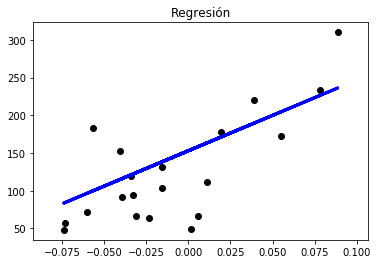

In [8]:
plt.scatter(diabetes_X_test, diabetes_y_test,  color='black')
plt.plot(diabetes_X_test, diabetes_y_pred, color='blue', linewidth=3)

plt.title("Regresión")
plt.show()